Male and female names have some distinctive characteristics.
Names ending in a, e, and i are likely to be female, while names ending in k, o, r, s, and
t are likely to be male. Let’s build a classifier to model these differences more precisely.

In [1]:
from nltk.corpus import names
import nltk
import random
import numpy as np

In [2]:
names = ([(name, 'male') for name in names.words('male.txt')] + 
         [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

In [3]:
names[:4]

[('Howie', 'male'), ('Valentine', 'male'), ('Worthy', 'male'), ('Ray', 'male')]

In [4]:
def gender_features(word):
    return word[-2:] # different in lecture! 

In [5]:
gender_features("Trinity")

'ty'

In [6]:
featuresets = [({'feature': gender_features(n)}, g) for n, g in names]
train_set, test_set = featuresets[500:], featuresets[:500]

In [7]:
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [8]:
classifier.prob_classify({'feature': gender_features('Esther')}).prob('female')

0.19243843268072308

Lets bring the data into `sklearn`-format. 

In [9]:
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
#probs = [(p, 1-p) for p in probs]

In [10]:
probs[:2]

[0.7332986700974907, 0.8706673657347003]

In [11]:
labels = [1 if a == 'female' else 0 for _, a in test_set]

In [12]:
labels[:2]

[0, 0]

Now, lets plot the ROC curve. 

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

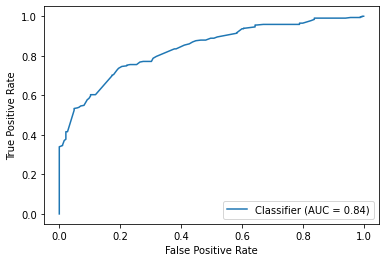

In [14]:
display = RocCurveDisplay.from_predictions(
    labels,
    probs
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)

How good is this classifier compared to other ones? What if one were to use the last three letters? 

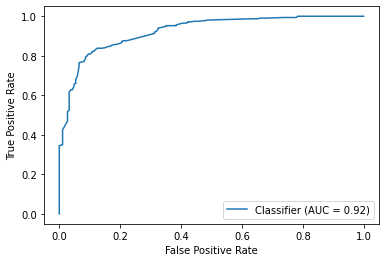

In [15]:
def gender_features(word):
    return word[-3:] 
featuresets = [({'feature': gender_features(n)}, g) for n, g in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(featuresets)
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
labels = [1 if a == 'female' else 0 for _, a in test_set]
display = RocCurveDisplay.from_predictions(
    labels,
    probs
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)

The first letter is useless: 

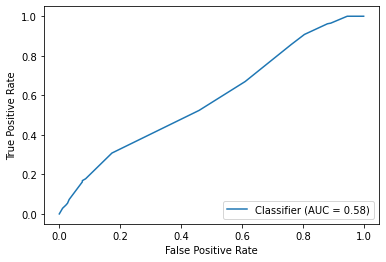

In [16]:
def gender_features(word):
    return word[1] 
featuresets = [({'feature': gender_features(n)}, g) for n, g in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(featuresets)
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
labels = [1 if a == 'female' else 0 for _, a in test_set]
display = RocCurveDisplay.from_predictions(
    labels,
    probs
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)

We can also engineer multiple features. 

In [18]:
def gender_features2(name):
    features = {}
    features["firstletter"] = name[0].lower()
    features["lastletter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

In [19]:
gender_features2("Danielle")

{'firstletter': 'd',
 'lastletter': 'e',
 'count(a)': 1,
 'has(a)': True,
 'count(b)': 0,
 'has(b)': False,
 'count(c)': 0,
 'has(c)': False,
 'count(d)': 1,
 'has(d)': True,
 'count(e)': 2,
 'has(e)': True,
 'count(f)': 0,
 'has(f)': False,
 'count(g)': 0,
 'has(g)': False,
 'count(h)': 0,
 'has(h)': False,
 'count(i)': 1,
 'has(i)': True,
 'count(j)': 0,
 'has(j)': False,
 'count(k)': 0,
 'has(k)': False,
 'count(l)': 2,
 'has(l)': True,
 'count(m)': 0,
 'has(m)': False,
 'count(n)': 1,
 'has(n)': True,
 'count(o)': 0,
 'has(o)': False,
 'count(p)': 0,
 'has(p)': False,
 'count(q)': 0,
 'has(q)': False,
 'count(r)': 0,
 'has(r)': False,
 'count(s)': 0,
 'has(s)': False,
 'count(t)': 0,
 'has(t)': False,
 'count(u)': 0,
 'has(u)': False,
 'count(v)': 0,
 'has(v)': False,
 'count(w)': 0,
 'has(w)': False,
 'count(x)': 0,
 'has(x)': False,
 'count(y)': 0,
 'has(y)': False,
 'count(z)': 0,
 'has(z)': False}

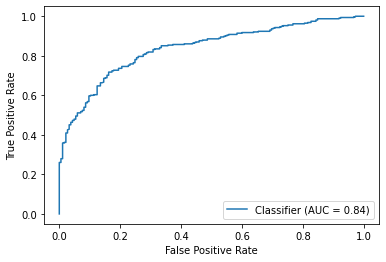

In [20]:
featuresets = [(gender_features2(n), g) for n, g in names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(featuresets)
probs = [classifier.prob_classify(a).prob('female') for a, b in test_set]
labels = [1 if a == 'female' else 0 for _, a in test_set]
display = RocCurveDisplay.from_predictions(
    labels,
    probs
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)